# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime as dt
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

606


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"


# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="


#Lists for holding variables
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

#Initiate count for city number below
count = 1

print(f"Beginning Data Retrieval")   
print("-"*40)

# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        
        print(f"Processing Record {count} | {city}") 
        
        count += 1
   
    except:
        print(f"City not found. Skipping...")
        continue
print("-"*40)
print(f"Data Retrieval Complete")   
print("-"*40)

Beginning Data Retrieval
----------------------------------------
City not found. Skipping...
Processing Record 1 | ushuaia
Processing Record 2 | albany
Processing Record 3 | uray
Processing Record 4 | puerto ayora
Processing Record 5 | zinder
Processing Record 6 | bredasdorp
Processing Record 7 | manzhouli
Processing Record 8 | vaini
Processing Record 9 | port elizabeth
Processing Record 10 | atuona
Processing Record 11 | mehamn
Processing Record 12 | butaritari
Processing Record 13 | hobart
Processing Record 14 | tasiilaq
Processing Record 15 | mont-joli
Processing Record 16 | darab
Processing Record 17 | bocaiuva
Processing Record 18 | saint-augustin
Processing Record 19 | kapaa
Processing Record 20 | ambanja
Processing Record 21 | cockburn town
Processing Record 22 | monster
Processing Record 23 | yellowknife
Processing Record 24 | nome
City not found. Skipping...
City not found. Skipping...
Processing Record 25 | zelenogorskiy
Processing Record 26 | rikitea
Processing Record 27 | 

Processing Record 228 | the valley
Processing Record 229 | batagay-alyta
Processing Record 230 | mount gambier
Processing Record 231 | lufilufi
Processing Record 232 | qaqortoq
Processing Record 233 | tezu
Processing Record 234 | vila velha
Processing Record 235 | san lawrenz
City not found. Skipping...
Processing Record 236 | bandarbeyla
Processing Record 237 | zapolyarnyy
Processing Record 238 | yauya
Processing Record 239 | yeniseysk
Processing Record 240 | toamasina
Processing Record 241 | lompoc
Processing Record 242 | batemans bay
Processing Record 243 | chapais
Processing Record 244 | nikolskoye
Processing Record 245 | carcassonne
City not found. Skipping...
Processing Record 246 | ivdel
Processing Record 247 | bull savanna
Processing Record 248 | broome
Processing Record 249 | cherskiy
Processing Record 250 | hofn
Processing Record 251 | yuancheng
Processing Record 252 | jamuria
Processing Record 253 | ligayan
Processing Record 254 | zykovo
Processing Record 255 | canguaretama


Processing Record 460 | bani walid
Processing Record 461 | warri
Processing Record 462 | taoudenni
Processing Record 463 | zaria
Processing Record 464 | okhotsk
Processing Record 465 | nadudvar
Processing Record 466 | uglekamensk
Processing Record 467 | qui nhon
Processing Record 468 | omsukchan
Processing Record 469 | yudong
Processing Record 470 | mandalgovi
Processing Record 471 | sivas
Processing Record 472 | ecuandureo
Processing Record 473 | samarai
City not found. Skipping...
Processing Record 474 | tsurib
Processing Record 475 | zhangye
Processing Record 476 | luanda
Processing Record 477 | trenton
Processing Record 478 | kuah
Processing Record 479 | markova
Processing Record 480 | buin
Processing Record 481 | ngunguru
Processing Record 482 | barra do garcas
Processing Record 483 | biharamulo
Processing Record 484 | araceli
Processing Record 485 | dezhou
Processing Record 486 | miri
Processing Record 487 | bantogon
Processing Record 488 | sao jose de mipibu
Processing Record 48

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
weather_dict = {
    "City": city_name,
    "Cloudiness":cloudiness,
    "Country":country,
    "Date":date,
    "Humidity":humidity,
    "Lat":lat,
    "Lng":lng,
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}
weather_data = pd.DataFrame(weather_dict)
weather_data.count()

City          562
Cloudiness    562
Country       562
Date          562
Humidity      562
Lat           562
Lng           562
Max Temp      562
Wind Speed    562
dtype: int64

In [9]:
weather_data.to_csv("weather_data.csv")
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ushuaia,40,AR,1616307635,76,-54.8000,-68.3000,48.20,31.07
1,Albany,1,US,1616307434,72,42.6001,-73.9662,35.01,3.60
2,Uray,99,RU,1616307636,90,60.1247,64.7758,8.20,9.57
3,Puerto Ayora,41,EC,1616307637,93,-0.7393,-90.3518,77.00,3.00
4,Zinder,0,NE,1616307637,16,13.8072,8.9881,80.60,11.50


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
test_stats = weather_data["Humidity"].describe(include = "all") 
print(test_stats)
print("No Values above 100%")

count    562.000000
mean      71.925267
std       21.380137
min        8.000000
25%       64.000000
50%       76.000000
75%       88.000000
max      100.000000
Name: Humidity, dtype: float64
No Values above 100%


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

This is a graph that shows the distribution of temperature over lattitude


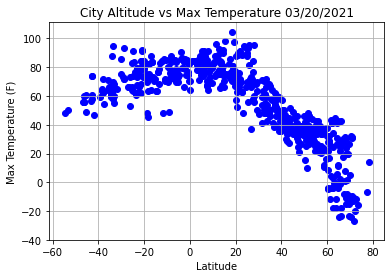

In [11]:
date = dt.date.today().strftime("%m/%d/%Y")

plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", color = "blue")

plt.title("City Altitude vs Max Temperature " + str(date))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.yticks(np.arange(-40, 120, 20))
plt.savefig("City Latitude vs. Temperature.png")
plt.grid(True)
print("This is a graph that shows the distribution of temperature over lattitude")


## Latitude vs. Humidity Plot

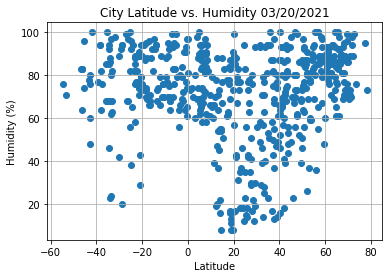

This plot is showing City latitude by humidity. The higher the dot the higher the humidity!


In [12]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"])
plt.title(f"City Latitude vs. Humidity {date}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("City Latitude vs Humidity.png")
plt.show()
print("This plot is showing City latitude by humidity. The higher the dot the higher the humidity!")

## Latitude vs. Cloudiness Plot

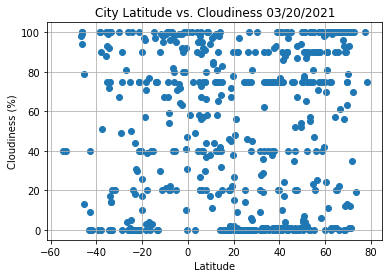

The higher the dot, the cloudier the city! Negative latitudes are in southern hemisphere while positive values are in norther!


In [13]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"])
plt.title(f"City Latitude vs. Cloudiness {date}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("City Latitude vs Cloudiness.png")
plt.show()
print("The higher the dot, the cloudier the city! Negative latitudes are in southern hemisphere while positive values are in norther!")


## Latitude vs. Wind Speed Plot

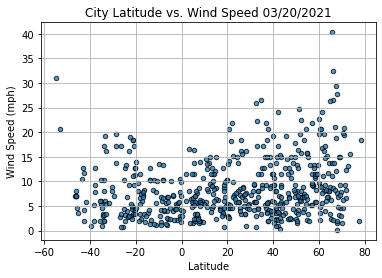

This is showing how lattitude effects wind speed


In [14]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=20,alpha=.75, edgecolors="k")
plt.title(f"City Latitude vs. Wind Speed {date}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("City Latitude vs Wind Speed.png")
plt.show()
print("This is showing how lattitude effects wind speed")


## Linear Regression

In [29]:
## Linear regression function from gendo90 gethub page

def makeLinRegression(df, x_Col, y_Col):
    (regr_slope, regr_intercept, regr_r_val, _, _) = linregress(df[x_Col], df[y_Col])
    regr_line_x = np.array([a for a in range(int(min(df[x_Col])), int(max(df[x_Col].values)+1))])
    regr_line_y = regr_slope *regr_line_x + regr_intercept
    df_axes = df.plot(kind = "scatter", x=x_Col, y=y_Col,title="{} vs {} ({})".format(y_Col, x_Col, weather_data["Date"].iloc[0]))
   # print("The equation of the best-fit linear regression line for this chart is y={:.2f}x+{:.2f}").format(regr_slope, regr_intercept)
   # print("The r-squared correlation Coefficient for this line is {:.2f}".format(regr_r_val))
    df_axes.plot(regr_line_x, regr_line_y, "r")
    return df_axes

#Create Northern and Southern Hemishpere DataFrames

northern_hemisphere = weather_data.loc[weather_data["Lat"] >= 0]
northern_cities_count = len(northern_hemisphere)
print("There are {} cities in the northern hemisphere out of {} cities total, representing {:.1%} of all cities in the data set.".format(northern_cities_count, len(weather_data), (northern_cities_count/len(weather_data))))

southern_hemisphere = weather_data.loc[weather_data["Lat"] < 0]
southern_cities_count = len(southern_hemisphere)
print("There are {} cities in the southern hemisphere out of {} cities total representing {:.1%} of all cities in the data set.".format(southern_cities_count, len(weather_data), (southern_cities_count/len(weather_data))))
                      

There are 401 cities in the northern hemisphere out of 562 cities total, representing 71.4% of all cities in the data set.
There are 161 cities in the southern hemisphere out of 562 cities total representing 28.6% of all cities in the data set.


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

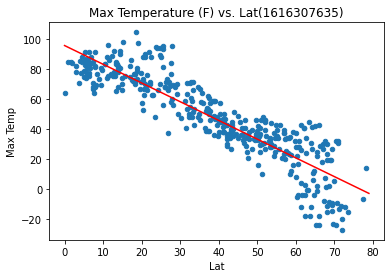

In [30]:
(n_temp_slope, n_temp_intercept, n_temp_r_val,_, _) = linregress(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])
regr_line_x = np.array([a for a in range(80)])
regr_line_y = n_temp_slope* regr_line_x + n_temp_intercept
n_temp_axes = northern_hemisphere.plot(kind="scatter", x="Lat",
                                      y= "Max Temp", 
                                      title = "Max Temperature (F) vs. Lat({})".format(weather_data["Date"].iloc[0]))
n_temp_axes.plot(regr_line_x, regr_line_y, "r")
n_temp_axes.get_figure().savefig("Temp_vs_latitud_N_Hemisphere.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

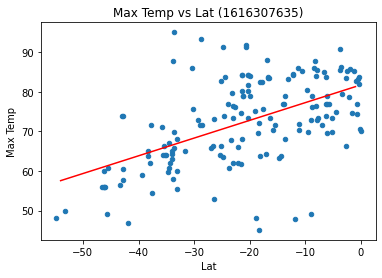

In [38]:
s_temp_lat_axes = makeLinRegression(southern_hemisphere, "Lat", "Max Temp")
s_temp_lat_axes.get_figure().savefig("Temp_vs_Latitude_S_Hemisphere.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

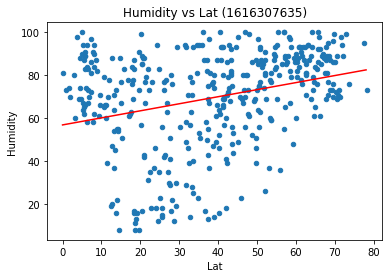

In [32]:
n_humidity_lat_axes = makeLinRegression(northern_hemisphere, "Lat", "Humidity")
n_humidity_lat_axes.get_figure().savefig("Humidity_vs_Latitude_N_Hemisphere.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

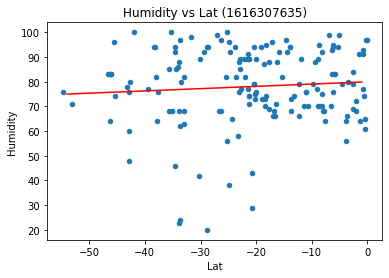

In [33]:
s_humidity_lat_axes = makeLinRegression(southern_hemisphere, "Lat", "Humidity")
s_humidity_lat_axes.get_figure().savefig("Humidity_vs_Latitude_S_Hemisphere.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

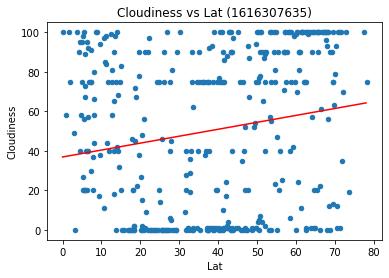

In [34]:
n_cloudiness_lat_axes= makeLinRegression(northern_hemisphere, "Lat", "Cloudiness")
n_cloudiness_lat_axes.get_figure().savefig("Cloudiness_vs_Latitude_N_Hemisphere.png") 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

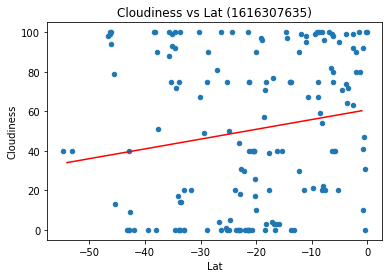

In [35]:
s_cloudiness_lat_axes = makeLinRegression(southern_hemisphere, "Lat", "Cloudiness")
s_cloudiness_lat_axes.get_figure().savefig("Cloudiness_vs_Latitude_S_Hemisphere.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

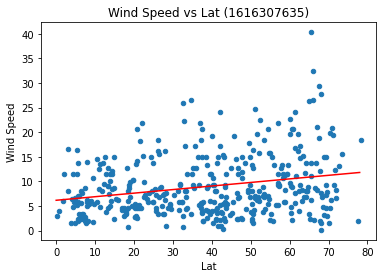

In [36]:
n_wind_lat_axes = makeLinRegression(northern_hemisphere, "Lat", "Wind Speed")
n_wind_lat_axes.get_figure().savefig("Wind_Speed_vs_Latitude_N_Hemisphere.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

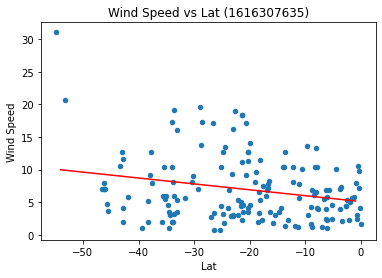

In [37]:
s_wind_lat_axes = makeLinRegression(southern_hemisphere, "Lat", "Wind Speed")
s_wind_lat_axes.get_figure().savefig("Wind_Speed_vsSatitude_S_Hemisphere.png")